# Machine Learning Lab 3

## 1.1 - Loading the Iris Dataset


In [1]:
from scipy.io import arff
import pandas as pd

# load the iris.arff data set
data = arff.loadarff('data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

iris_df.count #counts rows and columns

#iris_df.describe() - gets stats of data.


<bound method DataFrame.count of      sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

## 1.2 - Dataset information / basic stats

In [2]:
print("\nGeneral info\n")
print(iris_df.info())

print("\nStatistics (of numeric features)\n")
print(iris_df.describe())

print("\nInfo about the class\n")
print(iris_df['class'].describe(),"\n")
print(iris_df['class'].value_counts())


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None

Statistics (of numeric features)

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    

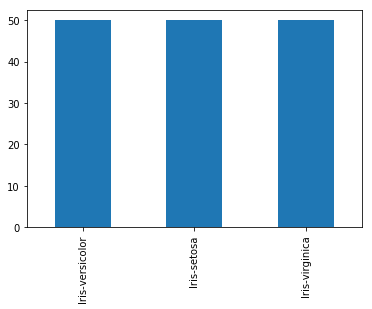

In [3]:
# task 1.3.1
iris_df["class"].value_counts().plot(kind='bar')

## 1.3 - Basic Plotting

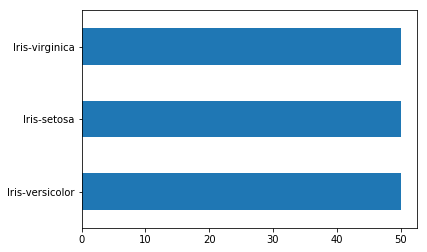

In [4]:
# task 1.3.2
iris_df["class"].value_counts().plot(kind='barh')

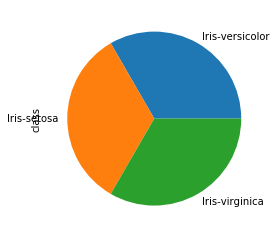

In [5]:
# Task 1.3.3
iris_df["class"].value_counts().plot(kind='pie')

Text(0, 0.5, 'Y AXIX LABEL')

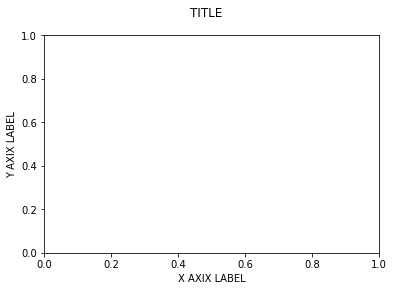

In [6]:
# Task 1.3.4 - the matplotlib way


import matplotlib.pyplot as plt

plt.figure()  # an empty figure with no axes
plt.suptitle('TITLE')  # add a title
plt.xlabel('X AXIX LABEL')
plt.ylabel('Y AXIX LABEL')

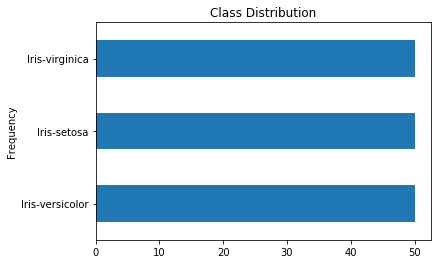

In [7]:
# Task 1.3.4
import matplotlib.pyplot as plt

plt.figure()  # an empty figure with no axes
iris_df['class'].value_counts().plot(kind="barh", title='Class Distribution', xlabel='Frequency');

## 1.4 - Visualising feature data

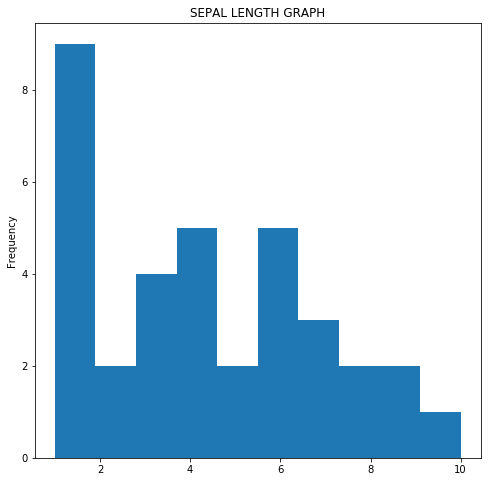

In [8]:
# Task 1.4.1
iris_df["sepallength"].value_counts().plot(kind='hist',title="SEPAL LENGTH GRAPH",figsize=(8,8))

<Figure size 432x288 with 0 Axes>

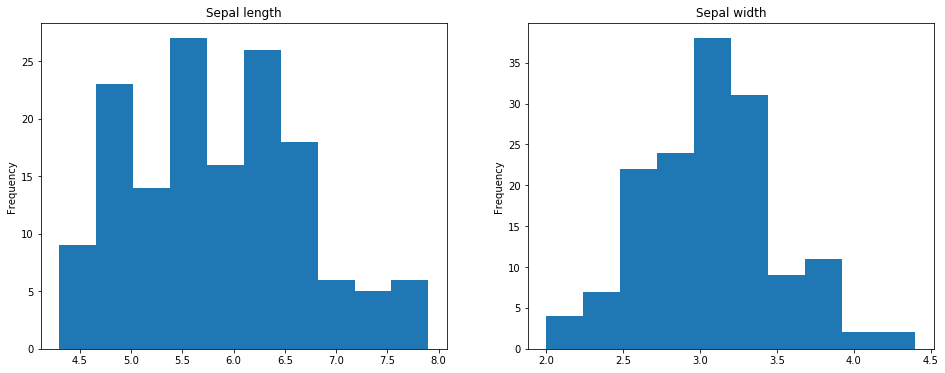

In [9]:
# Task 1.4.2
fig = plt.figure();
fig, axs = plt.subplots(nrows=1, ncols=2)
iris_df['sepallength'].plot(ax=axs[0], kind='hist', title='Sepal length', figsize=(16,6));
iris_df['sepalwidth'].plot(ax=axs[1], kind='hist', title='Sepal width', figsize=(16,6));

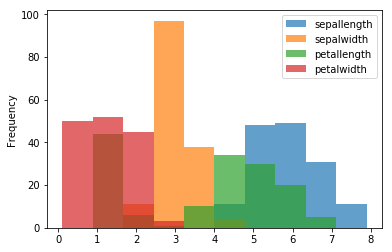

In [10]:
# Task 1.4.3 - a histogram for all features
iris_df.plot(kind='hist', alpha=0.7);

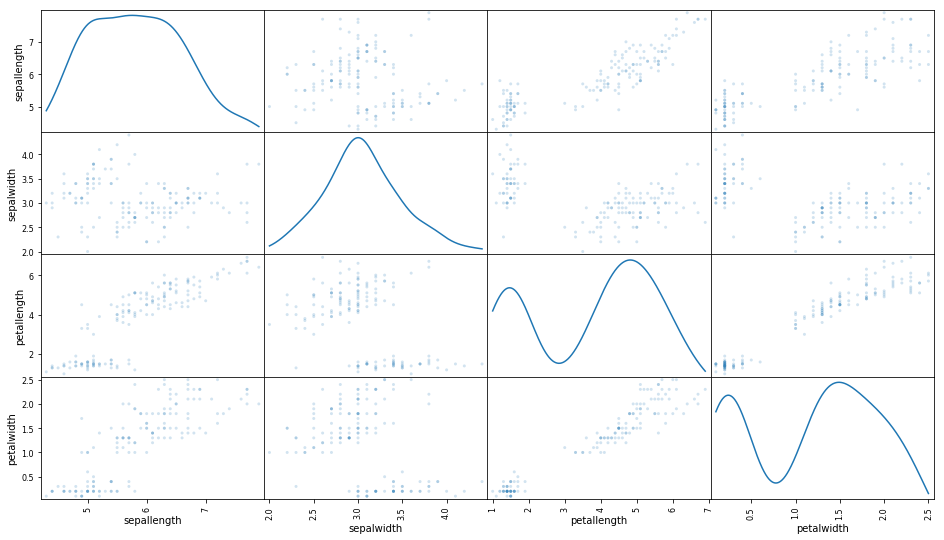

In [11]:
# Task 1.4.4
from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, alpha=0.2, figsize=(16, 9), diagonal='kde');

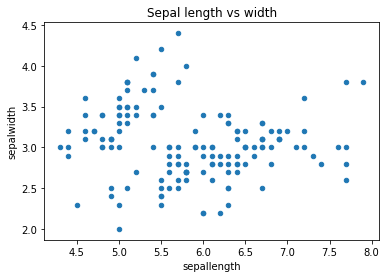

In [12]:
# Task 1.4.5 - a simple scatter plot for sepal length vs sepal width
iris_df.plot(kind='scatter', x='sepallength', y='sepalwidth', title='Sepal length vs width');

c:\users\jwhil\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\jwhil\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\jwhil\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

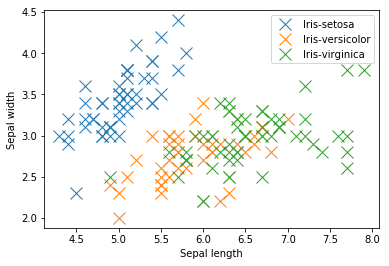

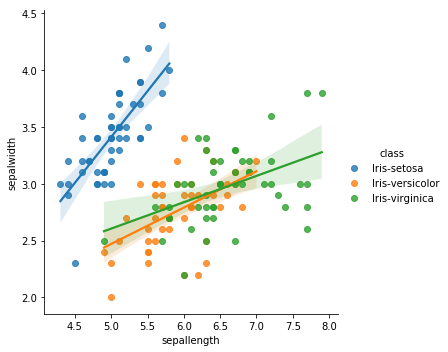

In [13]:
# Task 1.4.6 - a colour coded scatter plot according to class (also for for sepal length vs sepal width)
fig = plt.figure();
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

# group the data instances according to the different classes they belong to
groups = iris_df.groupby('class')

# iterate over each group and plot (scatter)
for name, group in groups:
    ax.plot(group.sepallength, group.sepalwidth, marker='x', linestyle='', ms=12, label=name)

# set labels for the y and x axes
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

# add legend to the figure
ax.legend()


#SEABORN ;O
import seaborn as sns
sns.lmplot(data=iris_df, x="sepallength", y="sepalwidth", hue='class')

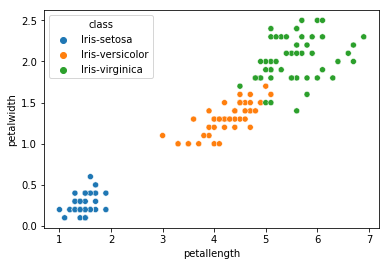

In [14]:
#petal width x petal length plot using seaborn
sns.scatterplot(data=iris_df, x="petallength", y="petalwidth", hue='class')

## 1.5 - Noise

Text(0, 0.5, 'Cm')

<Figure size 432x288 with 0 Axes>

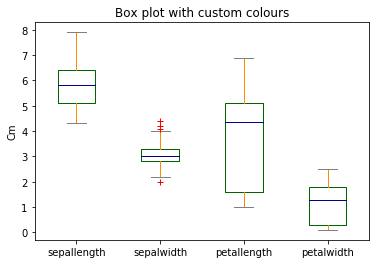

In [32]:
# Box plot in matplotlib/pandas
plt.figure();

# setting up custom colouring
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# a box plot for all features
box_plot = iris_df.plot.box(color=color, sym='r+');
box_plot.set_title('Box plot with custom colours')
box_plot.set_ylabel('Cm')

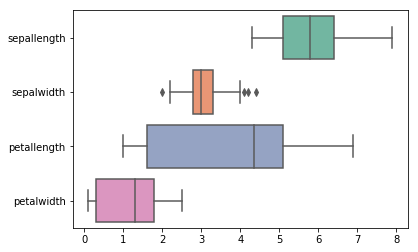

In [35]:
# and... using Seborn
sns.boxplot(data=iris_df, orient="h", palette="Set2")

## Correlation Analysis

In [37]:
# Calculate correlation coefficient sepal length and sepal width - positive or negative? or neutral (no correlation)
from scipy.stats import pearsonr

corr, _ = pearsonr(iris_df['sepallength'], iris_df['sepalwidth'])
print('Sepal length & sepal width: %.3f' % corr)

# Task 1.6.1 - use Spearman to calculate the correlation coefficient too
corr = iris_df.corr(method='pearson')
print (corr)

# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = iris_df.corr(method='spearman')
print ("\n",corr)

Sepal length & sepal width: -0.109
             sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000

              sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.159457     0.881386    0.834421
sepalwidth     -0.159457    1.000000    -0.303421   -0.277511
petallength     0.881386   -0.303421     1.000000    0.936003
petalwidth      0.834421   -0.277511     0.936003    1.000000


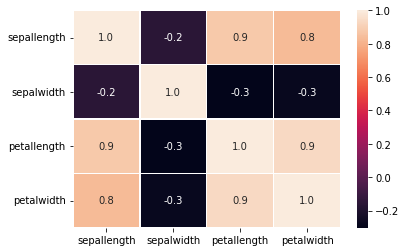

In [38]:
# Compute pairwise correlation of all features
# Correlation matrix - Seaborn heatmap
#Using data from spearmans correlation calculator to map these out visually.
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')

In [41]:
# Question 1.6.2 - which features have the strongest correlation?
#The overlapping features eg sepallength compared to sepallength.

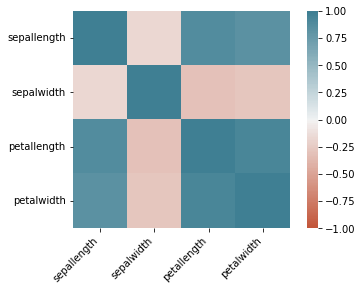

In [40]:
# Correlation matrix - Seaborn heatmap 
# Correlation matrix - customisations
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax

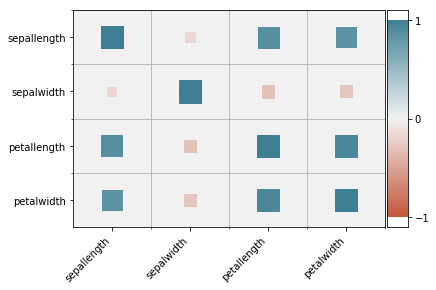

In [42]:
# Correlation matrix - customisations
# Correlation matrix -
import heatmap
heatmap.corrplot(corr)

In [22]:
# Correlation matrix - https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec


## 2.1 Loading the IMDB Movies Dataset

In [4]:
import pandas as pd
imdb_df = pd.read_csv('data/imdb.csv')
imdb_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1003 non-null   int64  
 1   Title               1003 non-null   object 
 2   Genre               1003 non-null   object 
 3   Description         1003 non-null   object 
 4   Director            1003 non-null   object 
 5   Actors              1003 non-null   object 
 6   Year                1003 non-null   int64  
 7   Runtime (Minutes)   1003 non-null   int64  
 8   Rating              1003 non-null   float64
 9   Votes               1003 non-null   int64  
 10  Revenue (Millions)  875 non-null    float64
 11  Metascore           939 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.5+ KB


In [6]:
imdb_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,875.000000,939.000000
mean,500.027916,2012.792622,113.133599,6.723729,1.695483e+05,83.262971,58.980831
std,289.634451,3.205980,18.802899,0.946089,1.885594e+05,103.402573,17.268532
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,249.500000,2010.000000,100.000000,6.200000,3.630600e+04,13.350000,47.000000
50%,500.000000,2014.000000,110.000000,6.800000,1.108250e+05,48.020000,60.000000
75%,750.500000,2016.000000,123.000000,7.400000,2.392805e+05,114.665000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Duplicates

In [7]:
# Get a Pandas Series (vector) indicating TRUE for rows that are a duplicate
imdb_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000    False
1001    False
1002     True
Length: 1003, dtype: bool

In [8]:
# Counting the True/False entries - should show 3 duplicates (True)
imdb_df.duplicated().value_counts()

False    1000
True        3
dtype: int64

In [11]:
# Get the actual rows that are duplicates
imdb_df = imdb_df.drop_duplicates()
imdb_df.shape # should now show 1000 instances

(1000, 12)

In [27]:
# Removing the duplicate rows
imdb_df = imdb_df.drop_duplicates()

## Missing Values

In [12]:
# Get DataFrame indicating True/False for whether values are missing or not
imdb_df.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
997,False,False,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,True,False


In [13]:
# Get the number of missing entries per feature (column)
imdb_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [19]:
# Dropping all rows with missing values
imdb_df_dropna = imdb_df.dropna()

In [20]:
# Imputing missing values, using the mean
imdb_df_mean = imdb_df.fillna(imdb_df.median())

In [21]:
imdb_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64